In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def PL_logdist_or_norm_book(fc, d, d0, n, sigma=None):
    lamda = 3e8 / fc
    PL = -20 * np.log10(lamda / (4 * np.pi * d0)) + 10 * n * np.log10(d / d0)
    if sigma is not None:
        PL += sigma * np.random.randn(*d.shape)
    return PL


In [3]:
def PL_free(fc, d, Gt=1, Gr=1):
    lamda = 3e8 / fc
    tmp = lamda / (4 * np.pi * d)
    tmp *= np.sqrt(Gt) * np.sqrt(Gr)
    PL = -20 * np.log10(tmp)
    return PL


In [4]:
# plot_PL_general
fc = 1.5e9
d0 = 100
sigma = 3
distance = (np.arange(1, 32, 2))**2
Gt = np.array([1, 1, 0.5])
Gr = np.array([1, 0.5, 0.5])
Exp = np.array([2, 3, 6])

y_Free = np.zeros((3, len(distance)))
y_logdist = np.zeros((3, len(distance)))
y_lognorm = np.zeros((3, len(distance)))

for k in range(3):
    y_Free[k, :] = PL_free(fc, distance, Gt[k], Gr[k])
    y_logdist[k, :] = PL_logdist_or_norm_book(fc, distance, d0, Exp[k])
    y_lognorm[k, :] = PL_logdist_or_norm_book(fc, distance, d0, Exp[k], sigma)


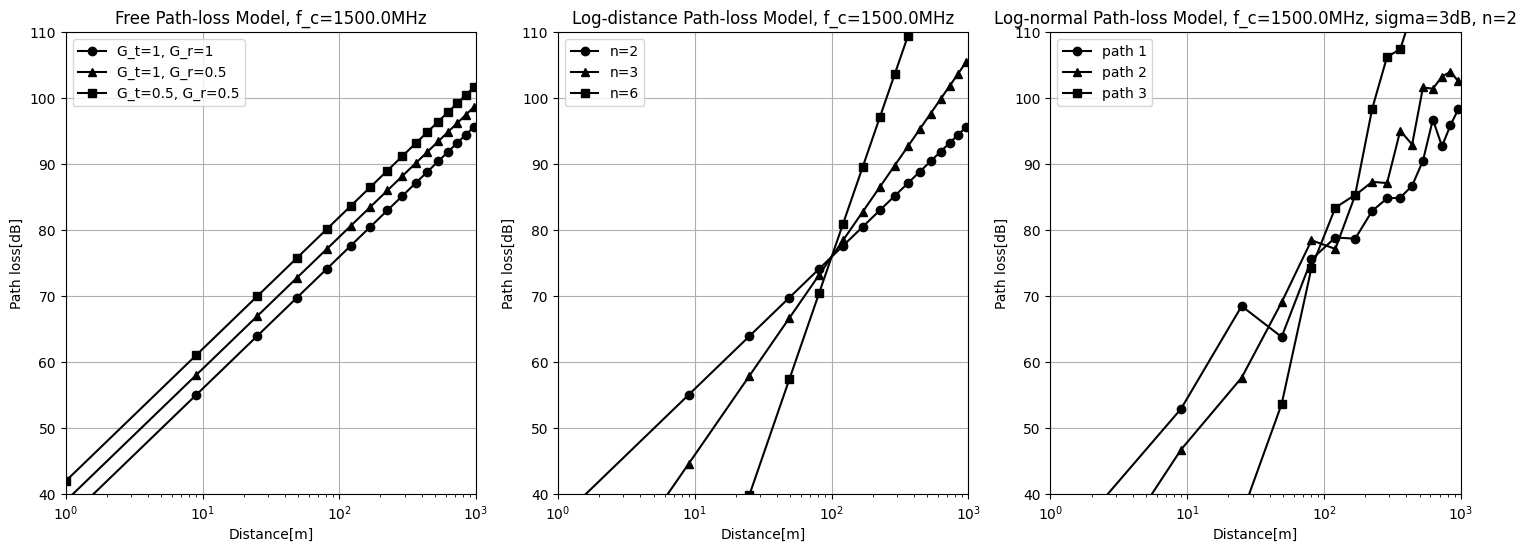

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].semilogx(distance, y_Free[0, :], 'k-o', distance, y_Free[1, :], 'k-^', distance, y_Free[2, :], 'k-s')
axs[0].grid(True)
axs[0].axis([1, 1000, 40, 110])
axs[0].set_title(f'Free Path-loss Model, f_c={fc/1e6}MHz')
axs[0].set_xlabel('Distance[m]')
axs[0].set_ylabel('Path loss[dB]')
axs[0].legend(['G_t=1, G_r=1', 'G_t=1, G_r=0.5', 'G_t=0.5, G_r=0.5'])

axs[1].semilogx(distance, y_logdist[0, :], 'k-o', distance, y_logdist[1, :], 'k-^', distance, y_logdist[2, :], 'k-s')
axs[1].grid(True)
axs[1].axis([1, 1000, 40, 110])
axs[1].set_title(f'Log-distance Path-loss Model, f_c={fc/1e6}MHz')
axs[1].set_xlabel('Distance[m]')
axs[1].set_ylabel('Path loss[dB]')
axs[1].legend(['n=2', 'n=3', 'n=6'])

axs[2].semilogx(distance, y_lognorm[0, :], 'k-o', distance, y_lognorm[1, :], 'k-^', distance, y_lognorm[
    2, :], 'k-s')
axs[2].grid(True)
axs[2].axis([1, 1000, 40, 110])
axs[2].set_title(f'Log-normal Path-loss Model, f_c={fc/1e6}MHz, sigma={sigma}dB, n=2')
axs[2].set_xlabel('Distance[m]')
axs[2].set_ylabel('Path loss[dB]')
axs[2].legend(['path 1', 'path 2', 'path 3'])

plt.show()


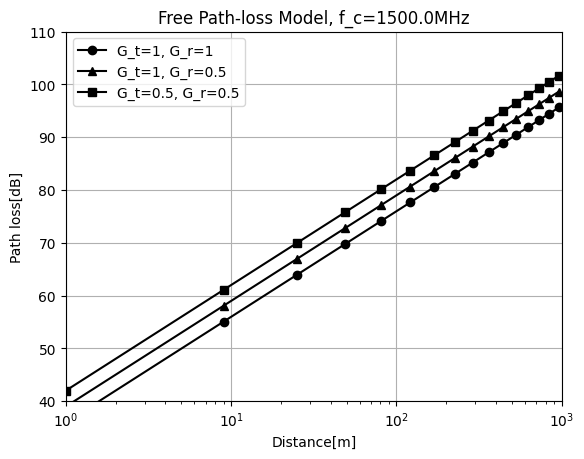

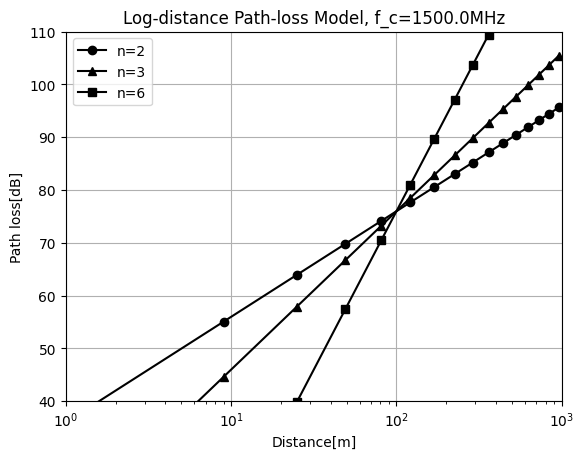

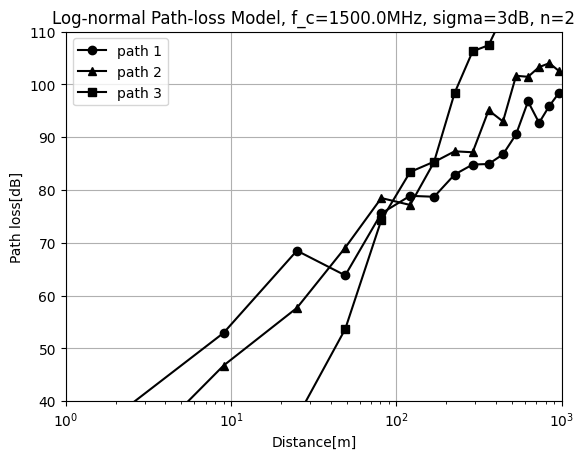

In [6]:
# Plot Free Path-loss Model
plt.figure()
plt.semilogx(distance, y_Free[0, :], 'k-o', distance, y_Free[1, :], 'k-^', distance, y_Free[2, :], 'k-s')
plt.grid(True)
plt.axis([1, 1000, 40, 110])
plt.title(f'Free Path-loss Model, f_c={fc/1e6}MHz')
plt.xlabel('Distance[m]')
plt.ylabel('Path loss[dB]')
plt.legend(['G_t=1, G_r=1', 'G_t=1, G_r=0.5', 'G_t=0.5, G_r=0.5'])
plt.show()

# Plot Log-distance Path-loss Model
plt.figure()
plt.semilogx(distance, y_logdist[0, :], 'k-o', distance, y_logdist[1, :], 'k-^', distance, y_logdist[2, :], 'k-s')
plt.grid(True)
plt.axis([1, 1000, 40, 110])
plt.title(f'Log-distance Path-loss Model, f_c={fc/1e6}MHz')
plt.xlabel('Distance[m]')
plt.ylabel('Path loss[dB]')
plt.legend(['n=2', 'n=3', 'n=6'])
plt.show()

# Plot Log-normal Path-loss Model
plt.figure()
plt.semilogx(distance, y_lognorm[0, :], 'k-o', distance, y_lognorm[1, :], 'k-^', distance, y_lognorm[2, :], 'k-s')
plt.grid(True)
plt.axis([1, 1000, 40, 110])
plt.title(f'Log-normal Path-loss Model, f_c={fc/1e6}MHz, sigma={sigma}dB, n=2')
plt.xlabel('Distance[m]')
plt.ylabel('Path loss[dB]')
plt.legend(['path 1', 'path 2', 'path 3'])
plt.show()
